# The Model Mask #

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt


In [2]:
# Call the Benchmark Composition
df_comp = pd.read_csv(r'..\additional_data\index_comp.csv')

# Dates Index
df_comp.set_index('date', inplace = True)
df_comp.index = pd.to_datetime(df_comp.index)
df_comp = df_comp.loc['2015':]

df_comp

,tickers
date,
2015-01-07,"A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,..."
2015-01-13,"A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,..."
2015-01-14,"A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,..."
2015-01-15,"A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,..."
2015-01-27,"A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,..."
...,...
2024-09-23,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-09-30,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-10-01,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."


In [3]:
# Now we are going to split the strings of the observations

df_comp['tickers'] = df_comp['tickers'].str.split(', ')
df_comp['tickers'] = df_comp['tickers'].apply(lambda x: [ticker.strip() for ticker in x])

df_comp.iloc[0]

tickers    [A,AABA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP...
Name: 2015-01-07 00:00:00, dtype: object

In [4]:
# Let us obtain the historical tickers 

unique_tickers = []

# Loop
for date in df_comp.index:
    
    # Call the Lists of Tickers for each date
    tickers = df_comp.loc[date].iloc[0][0].split(',')
    
    # Store them on a list
    unique_tickers = list(set(unique_tickers) | set(tickers))

unique_tickers = sorted(unique_tickers)

len(unique_tickers)

735

In [5]:
# Now create a dataframe with all zeros

mask = pd.DataFrame(0, index=df_comp.index, columns=unique_tickers)

mask

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-10-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# And we change zeros to ones if each stock was in the benchmark's composition at each date

for date in df_comp.index:
    
    tickers = df_comp.loc[date].iloc[0][0].split(',')
    
    for ticker in tickers:
        
        mask.loc[date, ticker] = 1

# Show
mask

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-13,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-14,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-15,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-27,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1
2024-09-30,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1
2024-10-01,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1


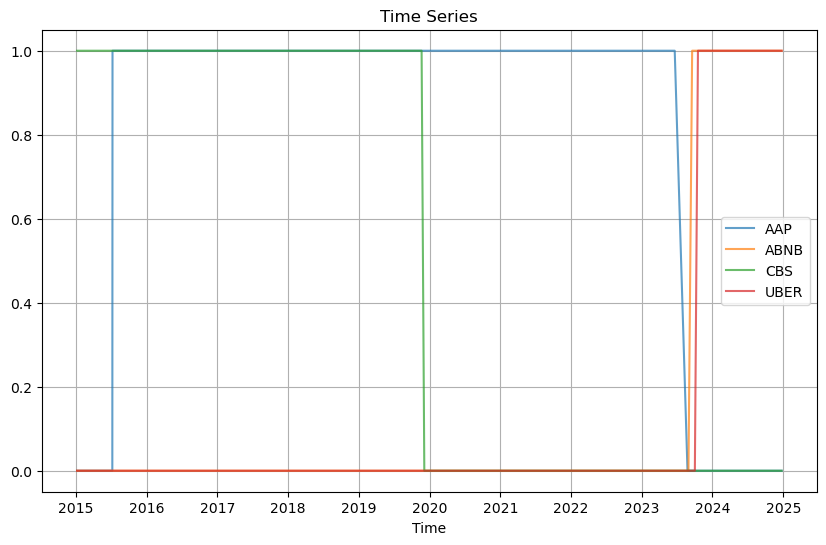

In [7]:
# Let's Plot the Transitions
stocks = ['AAP', 'ABNB', 'CBS', 'UBER']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask[stocks], label=stocks, alpha=0.7)
# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [8]:
# Let's found those stocks that alternate frequently

def count_alternations(column):
    return (column != column.shift()).sum() - 1

In [9]:
# Apply the function

alternations = mask.apply(count_alternations).rename('alternations')

alternations.sort_values(ascending=False)

DXC     3
EVHC    2
RE      2
VIAC    2
QRVO    2
       ..
HRL     0
HPQ     0
HON     0
HIG     0
ZTS     0
Name: alternations, Length: 735, dtype: int64

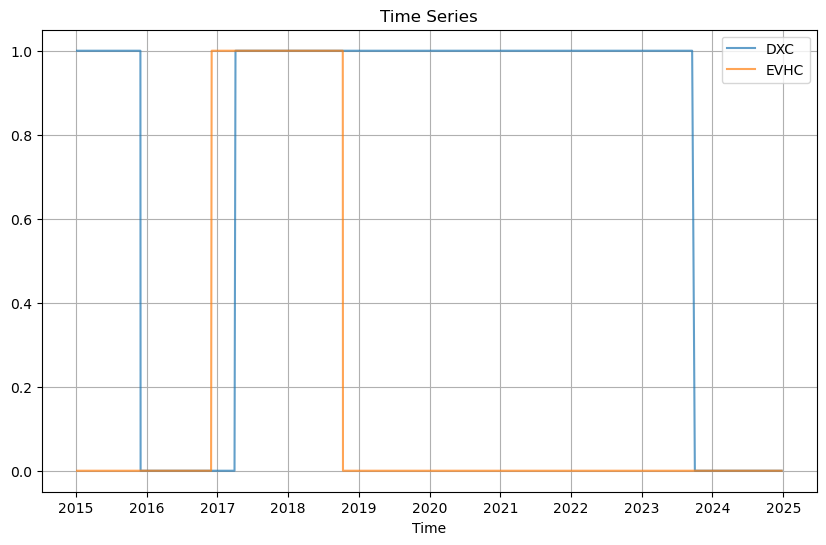

In [10]:
# Let's Plot the Transitions
stocks = ['DXC', 'EVHC']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask[stocks], label=stocks, alpha=0.7)
# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

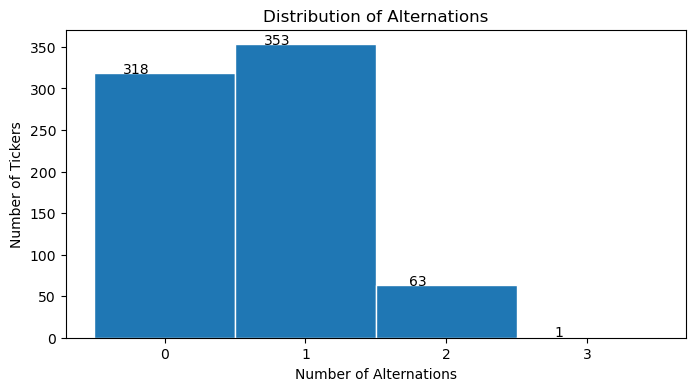

In [11]:
# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(alternations, bins=np.arange(0, 5) - 0.5, edgecolor='white')
plt.title('Distribution of Alternations')
plt.xlabel('Number of Alternations')
plt.ylabel('Number of Tickers')
plt.xticks(range(4))

# Add Notations
for count in range(4):
    count_value = (alternations == count).sum()
    plt.text(count - 0.2, count_value + 0.1, str(count_value), ha='center')

plt.show()

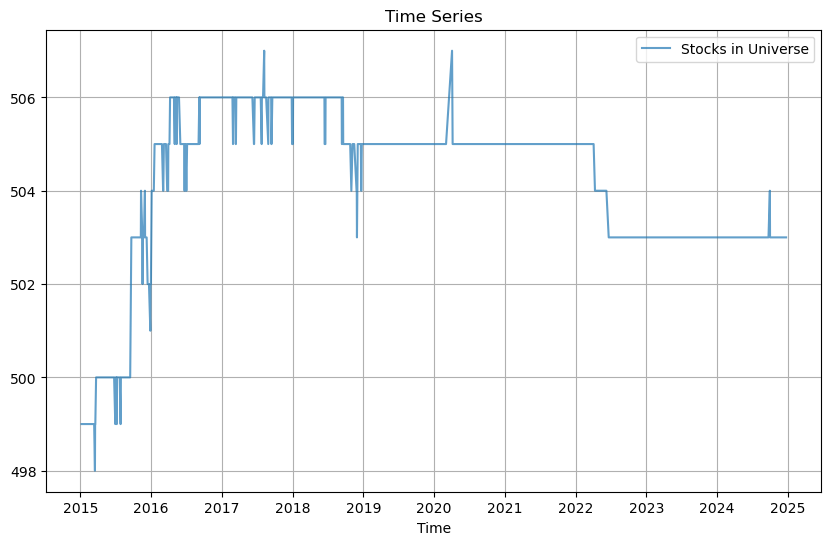

In [12]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask.sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

### Use the available data ###

In [13]:
# Call the list of available tickers
info_tickers = pd.read_csv(r'..\additional_data\tickers.csv')
info_tickers = info_tickers['tickers'].to_list()

info_tickers

['A',
 'AAPL',
 'ABBV',
 'ABT',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALL',
 'AMAT',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APO',
 'ARE',
 'AWK',
 'BALL',
 'BDX',
 'BK',
 'BKNG',
 'BLDR',
 'BMY',
 'BR',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CBRE',
 'CCI',
 'CDNS',
 'CDW',
 'CE',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPB',
 'CPRT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTRA',
 'CTSH',
 'CVS',
 'CVX',
 'CZR',
 'D',
 'DAL',
 'DE',
 'DECK',
 'DELL',
 'DFS',
 'DG',
 'DGX',
 'DHI',
 'DHR',
 'DIS',
 'DLR',
 'DLTR',
 'DOC',
 'DOV',
 'DPZ',
 'DRI',
 'DTE',
 'DUK',
 'DVA',
 'DVN',
 'DXCM',
 'EA',
 'EBAY',
 'ECL',
 'ED',
 'EFX',
 'ERIE',
 'EVRG',
 'EW',
 'EXC',
 'EXPD',
 'EXPE

In [14]:
# Cut the mask
available_mask = mask[info_tickers]

available_mask

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
2015-01-13,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
2015-01-14,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
2015-01-15,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
2015-01-27,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2024-09-30,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2024-10-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


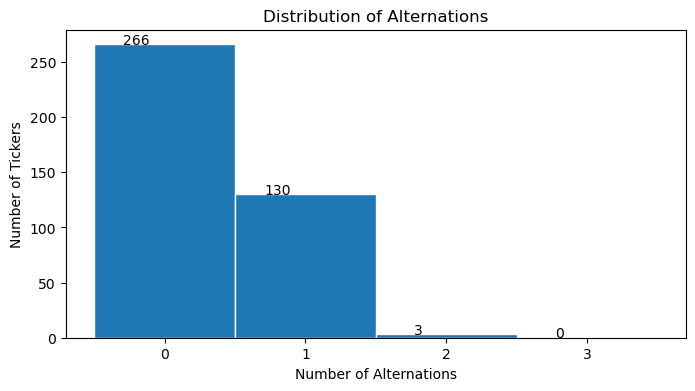

In [15]:
# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(alternations[info_tickers], bins=np.arange(0, 5) - 0.5, edgecolor='white')
plt.title('Distribution of Alternations')
plt.xlabel('Number of Alternations')
plt.ylabel('Number of Tickers')
plt.xticks(range(4))

# Add Notations
for count in range(4):
    count_value = (alternations[info_tickers] == count).sum()
    plt.text(count - 0.2, count_value + 0.1, str(count_value), ha='center')

plt.show()

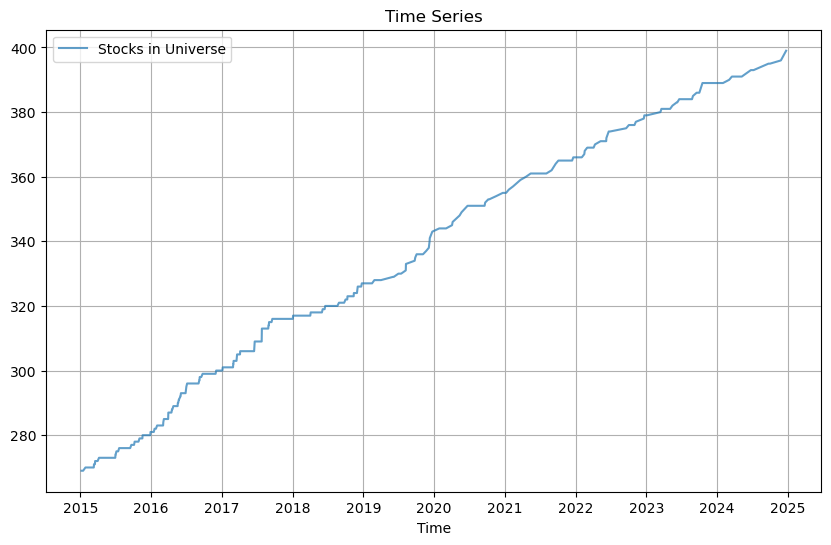

In [16]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(available_mask.sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [17]:
# Store the Data
available_mask.to_csv(r'..\additional_data\universe_mask.csv')

## Filtering the Mask ##

The most important requirement for our model to work is the quality of the data. Without reliable data, we cannot build trustworthy models. Therefore, we will filter our universe based on the availability of Market Capitalization and Adjusted Close Price data.

In [21]:
# Variables of use

variables = [
    'm_adjusted_close', 'c_market_cap', 'fi_weighted_average_shares_outstanding'
]

names = [
    'adj_close', 'market_cap', 'shares_outstanding',
]

In [22]:
# Create the DataFrames inside a dictionary
universe = {}
drops = []

# Create the Loop
for ticker in mask.columns:
    try:
        # Create the DataFrame
        df = pd.read_csv(r'..\Output\{}.csv'.format(ticker))
        df = df.set_index('m_date')                               # Set Index
        df.index = pd.to_datetime(df.index)                     # Index to date time
        df = df[variables]                                      # Use the variables we need
        df.columns = names                                      # Rename columns
        
        # Store Dataframe
        universe[ticker] = df.loc['2015':]
        
    except:
        drops.append(ticker)
        print("No data for", ticker)
    
    print(f'{ticker} is ready.')

A is ready.
AABA is ready.
AAL is ready.
AAP is ready.
AAPL is ready.
ABBV is ready.
ABC is ready.
ABMD is ready.
ABNB is ready.
ABT is ready.
ACGL is ready.
ACN is ready.
ADBE is ready.
ADI is ready.
ADM is ready.
ADP is ready.
ADS is ready.
ADSK is ready.
ADT is ready.
AEE is ready.
AEP is ready.
No data for AES
AES is ready.
AET is ready.
AFL is ready.
AGN is ready.
AIG is ready.
AIV is ready.
AIZ is ready.
AJG is ready.
AKAM is ready.
ALB is ready.
ALGN is ready.
ALK is ready.
ALL is ready.
ALLE is ready.
ALTR is ready.
ALXN is ready.
AMAT is ready.
AMCR is ready.
AMD is ready.
AME is ready.
AMG is ready.
AMGN is ready.
AMP is ready.
AMT is ready.
AMTM is ready.
AMZN is ready.
AN is ready.
ANDV is ready.
ANET is ready.
ANSS is ready.
ANTM is ready.
AON is ready.
AOS is ready.
APA is ready.
No data for APC
APC is ready.
APD is ready.
APH is ready.
APO is ready.
APTV is ready.
ARE is ready.
ARG is ready.
ARNC is ready.
ATI is ready.
ATO is ready.
ATVI is ready.
AVB is ready.
AVGO is 

In [23]:
print(len(universe))
print(len(drops))

694
41


In [24]:
# Cut
cut_mask = mask.drop(columns=drops)

In [25]:
# Fill NANs with available data
for key, df in universe.items():
    df['market_cap'] = df['market_cap'].fillna(df['adj_close'] * df['shares_outstanding'])

In [26]:
# Store Insufficient Data
insufficient_mktcap_data = {}

for key, df in universe.items():
    non_null_count = df['market_cap'].count()
    if non_null_count <= 504:
        insufficient_mktcap_data[key] = non_null_count

# Show
missing_mktcap = list(insufficient_mktcap_data.keys())
len(missing_mktcap)

27

In [27]:
missing_mktcap

['AMTM',
 'ANDV',
 'ARG',
 'BBT',
 'BF.B',
 'BHGE',
 'BRCM',
 'CA',
 'CAM',
 'CCE',
 'CPGX',
 'CVC',
 'DNR',
 'EMC',
 'GEV',
 'GMCR',
 'KVUE',
 'LB',
 'MNK',
 'MON',
 'NBL',
 'PCP',
 'SNDK',
 'SOLV',
 'VLTO',
 'WCG',
 'XL']

In [28]:
# Store Insufficient Data
insufficient_adjclose_data = {}

for key, df in universe.items():
    non_null_count = df['adj_close'].count()
    if non_null_count <= 504:
        insufficient_adjclose_data[key] = non_null_count

# Show
missing_adjclose = list(insufficient_adjclose_data.keys())
len(missing_adjclose)

20

In [29]:
intersection = list(set(missing_adjclose) & set(missing_mktcap))
len(intersection)

20

### Drop the Stocks ###

We are going to drop all the stocks with less than 3 years of trading information

In [30]:
filtered_cut_mask = cut_mask.drop(columns=missing_mktcap)

filtered_cut_mask

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-13,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-14,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-15,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
2015-01-27,1,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1
2024-09-30,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1
2024-10-01,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,1,1,1,1,0,1


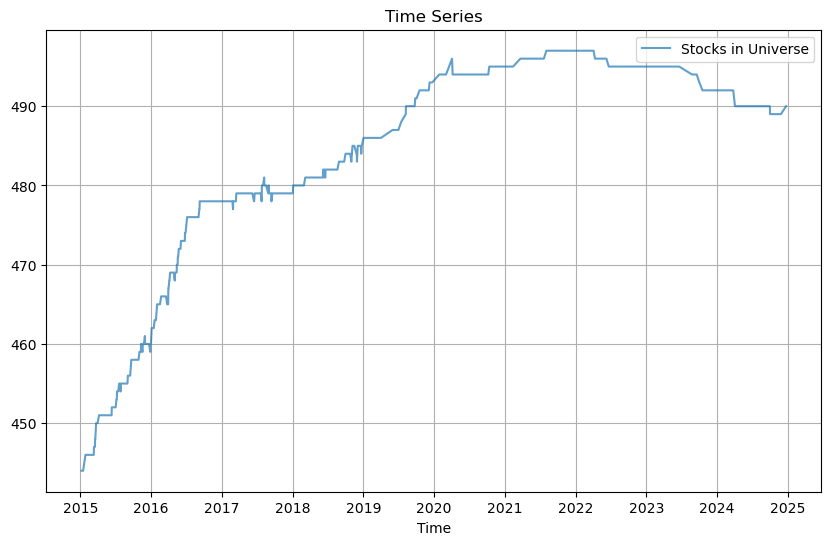

In [31]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_cut_mask.sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [32]:
# Create the DataFrame for Market Capitalization
mktcap_series = []

for stock in filtered_cut_mask.columns:
    series = universe[stock]['market_cap'].rename(stock)  
    mktcap_series.append(series)

# Concat
mktcap_df = pd.concat(mktcap_series, axis=1)
mktcap_df

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
m_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.354704e+10,NaN,3.876490e+10,1.156774e+10,6.486879e+11,1.050946e+11,2.027091e+10,1.509115e+09,NaN,6.761000e+10,...,1.159507e+10,3.961056e+11,7.363674e+09,1.022141e+10,6.938176e+09,2.304486e+10,1.845987e+10,3.936154e+09,5.564275e+09,2.171793e+10
2015-01-05,1.329320e+10,NaN,3.873973e+10,1.141527e+10,6.304117e+11,1.031168e+11,2.009836e+10,1.499407e+09,NaN,6.762506e+10,...,1.138099e+10,3.852674e+11,7.312626e+09,9.998528e+09,6.506362e+09,2.257971e+10,1.914770e+10,3.880744e+09,5.355787e+09,2.158755e+10
2015-01-06,1.308612e+10,NaN,3.813931e+10,1.140724e+10,6.306490e+11,1.026064e+11,2.020817e+10,1.461386e+09,NaN,6.685710e+10,...,1.121743e+10,3.832193e+11,7.221874e+09,9.863107e+09,6.468100e+09,2.230062e+10,1.898546e+10,3.852785e+09,5.151233e+09,2.137694e+10
2015-01-07,1.325980e+10,NaN,3.811774e+10,1.165237e+10,6.394311e+11,1.067534e+11,2.061152e+10,1.507901e+09,NaN,6.739919e+10,...,1.122142e+10,3.871022e+11,7.409050e+09,9.990064e+09,6.519116e+09,2.304043e+10,1.945697e+10,3.950896e+09,5.200404e+09,2.181822e+10
2015-01-08,1.365726e+10,NaN,3.858514e+10,1.175451e+10,6.638786e+11,1.078698e+11,2.065858e+10,1.575854e+09,NaN,6.878451e+10,...,1.147141e+10,3.935454e+11,7.591972e+09,1.026373e+10,6.568310e+09,2.344356e+10,1.966484e+10,4.035282e+09,5.273178e+09,2.215419e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,3.028980e+10,NaN,6.424080e+09,1.964350e+09,3.156303e+12,3.296983e+11,NaN,NaN,7.632373e+10,2.231293e+11,...,NaN,4.844393e+11,2.733500e+09,5.309489e+08,2.846684e+10,4.124400e+10,2.021064e+10,1.269791e+10,6.605874e+09,6.913824e+10
2025-04-28,3.045795e+10,NaN,6.489968e+09,1.949414e+09,3.169273e+12,3.408265e+11,NaN,NaN,7.681590e+10,2.243068e+11,...,NaN,4.847071e+11,2.757356e+09,5.458702e+08,2.842271e+10,4.137000e+10,2.026042e+10,1.255610e+10,6.620606e+09,6.918328e+10
2025-04-29,3.062610e+10,NaN,6.522912e+09,1.990039e+09,3.185411e+12,3.428997e+11,NaN,NaN,7.818027e+10,2.259866e+11,...,NaN,4.835023e+11,2.773260e+09,5.520874e+08,2.883652e+10,4.135320e+10,2.046549e+10,1.315201e+10,6.667748e+09,7.002122e+10


In [33]:
# Create a Binary DF for market cap
mktcap_binary = mktcap_df.notna().astype(int)

mktcap_binary

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
m_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-05,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-06,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-07,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2015-01-08,1,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,1,0,1,1,1,1,0,0,1,1,...,0,1,1,1,1,1,1,1,1,1
2025-04-28,1,0,1,1,1,1,0,0,1,1,...,0,1,1,1,1,1,1,1,1,1
2025-04-29,1,0,1,1,1,1,0,0,1,1,...,0,1,1,1,1,1,1,1,1,1


In [34]:
# Reindex Mask so it has the same periodicity
filtered_cut_mask_reindex = filtered_cut_mask.reindex(mktcap_binary.index)
filtered_cut_mask_reindex = filtered_cut_mask_reindex.ffill().bfill()

Now we are going to identify the stocks with non-matching data. Specifically, we will find the stocks that are included in the S&P 500 index but have no data available.

How? By subtracting the mask from the binary Market Cap DataFrame — the resulting values of -1 indicate stocks that should be removed.

In [36]:
# Create the dataframe

subtract = mktcap_binary - filtered_cut_mask_reindex
subtract

,A,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABNB,ABT,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
m_date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-01-05,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-01-06,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-01-07,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-01-08,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2025-04-28,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2025-04-29,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Find these columns
minus_one_counts = (subtract == -1).sum().sort_values(ascending=False)
minus_one_counts = minus_one_counts[minus_one_counts > 2*252]
list(minus_one_counts.index)

['ARNC',
 'STI',
 'HCP',
 'FOXA',
 'PX',
 'WYND',
 'CHK',
 'DOW',
 'AABA',
 'IR',
 'DNB',
 'SE',
 'FOX']

In [59]:
match_filtered_cut_mask_reindex = filtered_cut_mask_reindex.drop(columns=list(minus_one_counts.index))

match_filtered_cut_mask_reindex

,A,AAPL,ABBV,ABNB,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-05,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-06,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-07,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-08,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
#match_filtered_cut_mask_reindex.to_csv(r'..\additional_data\universe_mask.csv')